# 残差网络 ResNet

![resnet](https://zh-v2.d2l.ai/_images/functionclasses.svg)

In [1]:
import torch
from torch import nn
import d2l.torch as d2l
from torch.nn import functional as F

ResNet 块的设计, 注意这里的差别是是否有 $1\times 1$ 的卷积层

![ResNet](https://zh-v2.d2l.ai/_images/resnet-block.svg)

In [2]:
class Residual(nn.Module):
    def  __init__(self, input_channels, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels, kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [3]:
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [4]:
def resnet_block(input_channels, num_channels, num_residuals, first_block=False):
    block = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            block.append(Residual(input_channels, num_channels, use_1x1conv=True, strides=2))
        else:
            block.append(Residual(num_channels, num_channels))
        return block

总体的架构, 共有 $18$ 层, 通常被称为 $ResNet-18$

![all](https://zh-v2.d2l.ai/_images/resnet18.svg)

In [5]:
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))
net = nn.Sequential(
    b1, b2, b3, b4, b5,
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten(), nn.Linear(512, 10)
)

In [6]:
X = torch.randn(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Sequential output shape: 	 torch.Size([1, 64, 56, 56])
Sequential output shape: 	 torch.Size([1, 64, 56, 56])
Sequential output shape: 	 torch.Size([1, 128, 28, 28])
Sequential output shape: 	 torch.Size([1, 256, 14, 14])
Sequential output shape: 	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape: 	 torch.Size([1, 512, 1, 1])
Flatten output shape: 	 torch.Size([1, 512])
Linear output shape: 	 torch.Size([1, 10])


loss 0.052, train acc 0.984, test acc 0.830
5462.4 examples/sec on cuda:0


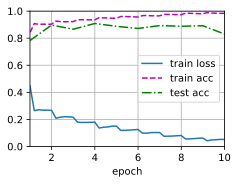

In [7]:
learning_rate, batch_size, num_epochs = 0.05, 256, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu(), ylim=[0.0, 1.0])

loss 0.005, train acc 0.999, test acc 0.928
5207.2 examples/sec on cuda:0


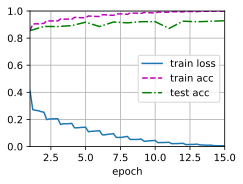

In [8]:
learning_rate, batch_size, num_epochs = 0.03, 128, 15
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu(), ylim=[0.0, 1.0])

loss 0.001, train acc 1.000, test acc 0.935
5232.9 examples/sec on cuda:0


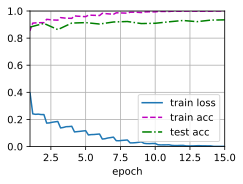

In [9]:
learning_rate, batch_size, num_epochs = 0.1, 128, 15
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu(), ylim=[0.0, 1.0])

loss 0.009, train acc 0.998, test acc 0.931
4887.4 examples/sec on cuda:0


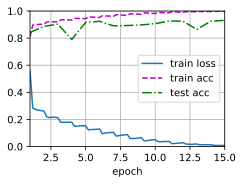

In [10]:
learning_rate, batch_size, num_epochs = 0.5, 128, 15
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu(), ylim=[0.0, 1.0])

loss 0.098, train acc 0.964, test acc 0.905
6296.8 examples/sec on cuda:0


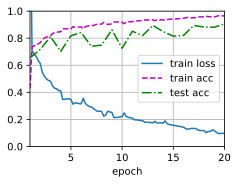

In [14]:
learning_rate, batch_size, num_epochs = 1, 2048, 20
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu(), ylim=[0.0, 1.0])